<h3>Exercise</h3>

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [25]:
import pandas as pd
df=pd.read_csv("bhp.csv")

In [26]:
df.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [27]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [28]:
#finding min and max threshold
min_thresh=df.price_per_sqft.quantile(0.001)
max_thresh=df.price_per_sqft.quantile(0.999)
min_thresh,max_thresh

(1366.184, 50959.36200000098)

In [29]:
# df2 has values between 0.001 and 0.999 percentile of df
df2=df[(df.price_per_sqft>=min_thresh) & (df.price_per_sqft<=max_thresh)]
df2.count()

location          13172
size              13172
total_sqft        13172
bath              13172
price             13172
bhk               13172
price_per_sqft    13172
dtype: int64

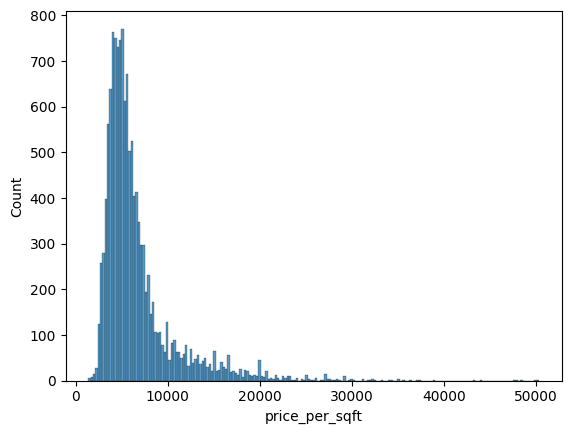

In [30]:
import seaborn as sb
from matplotlib import pyplot as plt

sb.histplot(df2.price_per_sqft)
plt.show()

In [31]:
#remove outliers from df2 using 4 std(standard deviation)
df2['zscore']=(df2.price_per_sqft - df2.price_per_sqft.mean() )/df2.price_per_sqft.std()
print (df2.shape)

(13172, 8)


C:\Users\Mujtaba Jafri\AppData\Local\Temp\ipykernel_1820\3248380192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore']=(df2.price_per_sqft - df2.price_per_sqft.mean() )/df2.price_per_sqft.std()


In [32]:
# removing values with std > or < 4
df3=df2[(df2.zscore<=4)&(df2.zscore>=-4)]

In [33]:
df3.shape

(13047, 8)

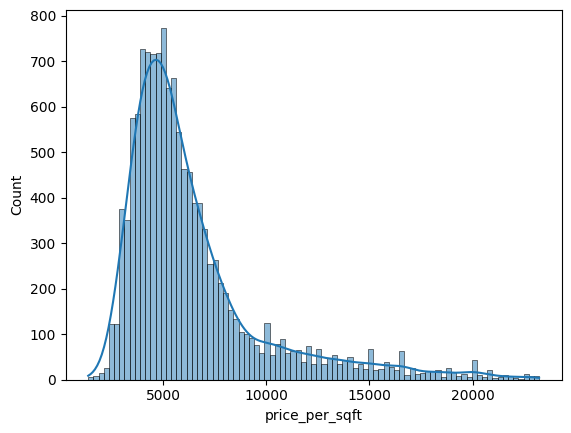

In [34]:
#plotting a histogram
sb.histplot(df3.price_per_sqft,kde=True)
plt.show()